# In this notebook we visualize effects of mutating same seq multiple times

In [2]:
import bioframe
import pandas as pd
import numpy as np
import tensorflow as tf
from basenji import dna_io
import akita_utils
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import akita_utils.format_io as format_io

# sns.set_theme()

In [3]:
def _load_data(h5_dirs,scd_stats,model_num):
    dataframes = []
    for h5_file in glob.glob(h5_dirs):
        dataframes.append(akita_utils.h5_to_df(h5_file, scd_stats, drop_duplicates_key=None))
    new_dataframe = pd.concat(dataframes)
    for stat in scd_stats:
        new_dataframe[f"mean_{stat}__h1_m{model_num}"] = (new_dataframe[f"{stat}_h1_m{model_num}_t0"]+new_dataframe[f"{stat}_h1_m{model_num}_t1"]+new_dataframe[f"{stat}_h1_m{model_num}_t2"]+new_dataframe[f"{stat}_h1_m{model_num}_t3"]+new_dataframe[f"{stat}_h1_m{model_num}_t4"]+new_dataframe[f"{stat}_h1_m{model_num}_t5"])/6
    new_dataframe.reset_index(drop=True, inplace=True)
    return new_dataframe

scd_stats = ["MPS","CS","SCD"] #"MSS",
h5_dirs_shuffled_seqs_scores_model0 = "/home1/kamulege/akita_utils/bin/background_seq_experiments/data/shuffled_seqs_scores_model0/*/*.h5" 
h5_dirs_shuffled_seqs_scores_model1 = "/home1/kamulege/akita_utils/bin/background_seq_experiments/data/shuffled_seqs_scores_model1/*/*.h5"
h5_dirs_shuffled_seqs_scores_model2 = "/home1/kamulege/akita_utils/bin/background_seq_experiments/data/shuffled_seqs_scores_model2/*/*.h5"
h5_dirs_shuffled_seqs_scores_model3 = "/home1/kamulege/akita_utils/bin/background_seq_experiments/data/shuffled_seqs_scores_model3/*/*.h5"
h5_dirs_shuffled_seqs_scores_model4 = "/home1/kamulege/akita_utils/bin/background_seq_experiments/data/shuffled_seqs_scores_model4/*/*.h5"
h5_dirs_shuffled_seqs_scores_model5 = "/home1/kamulege/akita_utils/bin/background_seq_experiments/data/shuffled_seqs_scores_model5/*/*.h5"
h5_dirs_shuffled_seqs_scores_model6 = "/home1/kamulege/akita_utils/bin/background_seq_experiments/data/shuffled_seqs_scores_model6/*/*.h5"
h5_dirs_shuffled_seqs_scores_model7 = "/home1/kamulege/akita_utils/bin/background_seq_experiments/data/shuffled_seqs_scores_model7/*/*.h5"

shuffled_seqs_scores_model0 = _load_data(h5_dirs_shuffled_seqs_scores_model0,scd_stats,0)
shuffled_seqs_scores_model1 = _load_data(h5_dirs_shuffled_seqs_scores_model1,scd_stats,1)
shuffled_seqs_scores_model2 = _load_data(h5_dirs_shuffled_seqs_scores_model2,scd_stats,2)
shuffled_seqs_scores_model3 = _load_data(h5_dirs_shuffled_seqs_scores_model3,scd_stats,3)
shuffled_seqs_scores_model4 = _load_data(h5_dirs_shuffled_seqs_scores_model4,scd_stats,4)
shuffled_seqs_scores_model5 = _load_data(h5_dirs_shuffled_seqs_scores_model5,scd_stats,5)
shuffled_seqs_scores_model6 = _load_data(h5_dirs_shuffled_seqs_scores_model6,scd_stats,6)
shuffled_seqs_scores_model7 = _load_data(h5_dirs_shuffled_seqs_scores_model7,scd_stats,7)

In [4]:
copy_merge = pd.DataFrame(shuffled_seqs_scores_model0["locus_specification"])
for df_num,df in enumerate([shuffled_seqs_scores_model0,shuffled_seqs_scores_model1,shuffled_seqs_scores_model2,shuffled_seqs_scores_model3,shuffled_seqs_scores_model4,shuffled_seqs_scores_model5,shuffled_seqs_scores_model6,shuffled_seqs_scores_model7]):
    copy_merge = copy_merge.merge(df, on = "locus_specification", suffixes=("",""))

for df in [shuffled_seqs_scores_model0,shuffled_seqs_scores_model1,shuffled_seqs_scores_model2,shuffled_seqs_scores_model3,shuffled_seqs_scores_model4,shuffled_seqs_scores_model5,shuffled_seqs_scores_model6,shuffled_seqs_scores_model7,copy_merge]:
    df[["locus_specification",'GC_content']] = df["locus_specification"].str.split('#',expand=True)
    df["GC_content"] = df["GC_content"].str.split('\n',expand=True)[0]
    df["GC_content"] = df["GC_content"].astype("float32")
    
copy_merge['binned'] = pd.cut(copy_merge['GC_content'], bins=3)
copy_merge.head()

,locus_specification,CS_h1_m0_t0,CS_h1_m0_t1,CS_h1_m0_t2,CS_h1_m0_t3,CS_h1_m0_t4,CS_h1_m0_t5,MPS_h1_m0_t0,MPS_h1_m0_t1,MPS_h1_m0_t2,...,SCD_h1_m7_t1,SCD_h1_m7_t2,SCD_h1_m7_t3,SCD_h1_m7_t4,SCD_h1_m7_t5,mean_MPS__h1_m7,mean_CS__h1_m7,mean_SCD__h1_m7,GC_content,binned
0,">shuffled:chr1,110790656,112101376",23.171875,-2.814453,44.1875,51.6875,38.6875,58.46875,0.019394,0.049805,-0.024078,...,24.875000,38.25000,36.43750,35.78125,32.31250,0.031021,13.281250,32.53125,0.365685,"(0.3656, 0.3658]"
1,">shuffled:chr1,110790656,112101376",23.171875,-2.814453,44.1875,51.6875,38.6875,58.46875,0.019394,0.049805,-0.024078,...,26.953125,37.25000,37.06250,33.59375,30.03125,0.041962,8.429688,31.81250,0.365685,"(0.3656, 0.3658]"
2,">shuffled:chr1,110790656,112101376",23.171875,-2.814453,44.1875,51.6875,38.6875,58.46875,0.019394,0.049805,-0.024078,...,49.187500,46.96875,45.25000,50.68750,42.93750,0.107971,4.441406,46.78125,0.365685,"(0.3656, 0.3658]"
3,">shuffled:chr1,110790656,112101376",23.171875,-2.814453,44.1875,51.6875,38.6875,58.46875,0.019394,0.049805,-0.024078,...,36.906250,40.28125,39.18750,39.68750,34.03125,0.078430,-0.576660,37.12500,0.365685,"(0.3656, 0.3658]"
4,">shuffled:chr1,110790656,112101376",23.171875,-2.814453,44.1875,51.6875,38.6875,58.46875,0.019394,0.049805,-0.024078,...,22.328125,36.59375,36.78125,30.09375,27.37500,0.034119,8.257812,29.18750,0.365685,"(0.3656, 0.3658]"


## Variation in the same model

/tmp/SLURM_10574179/ipykernel_164215/1877375924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df["GC_content"] = copy_merge["GC_content"]


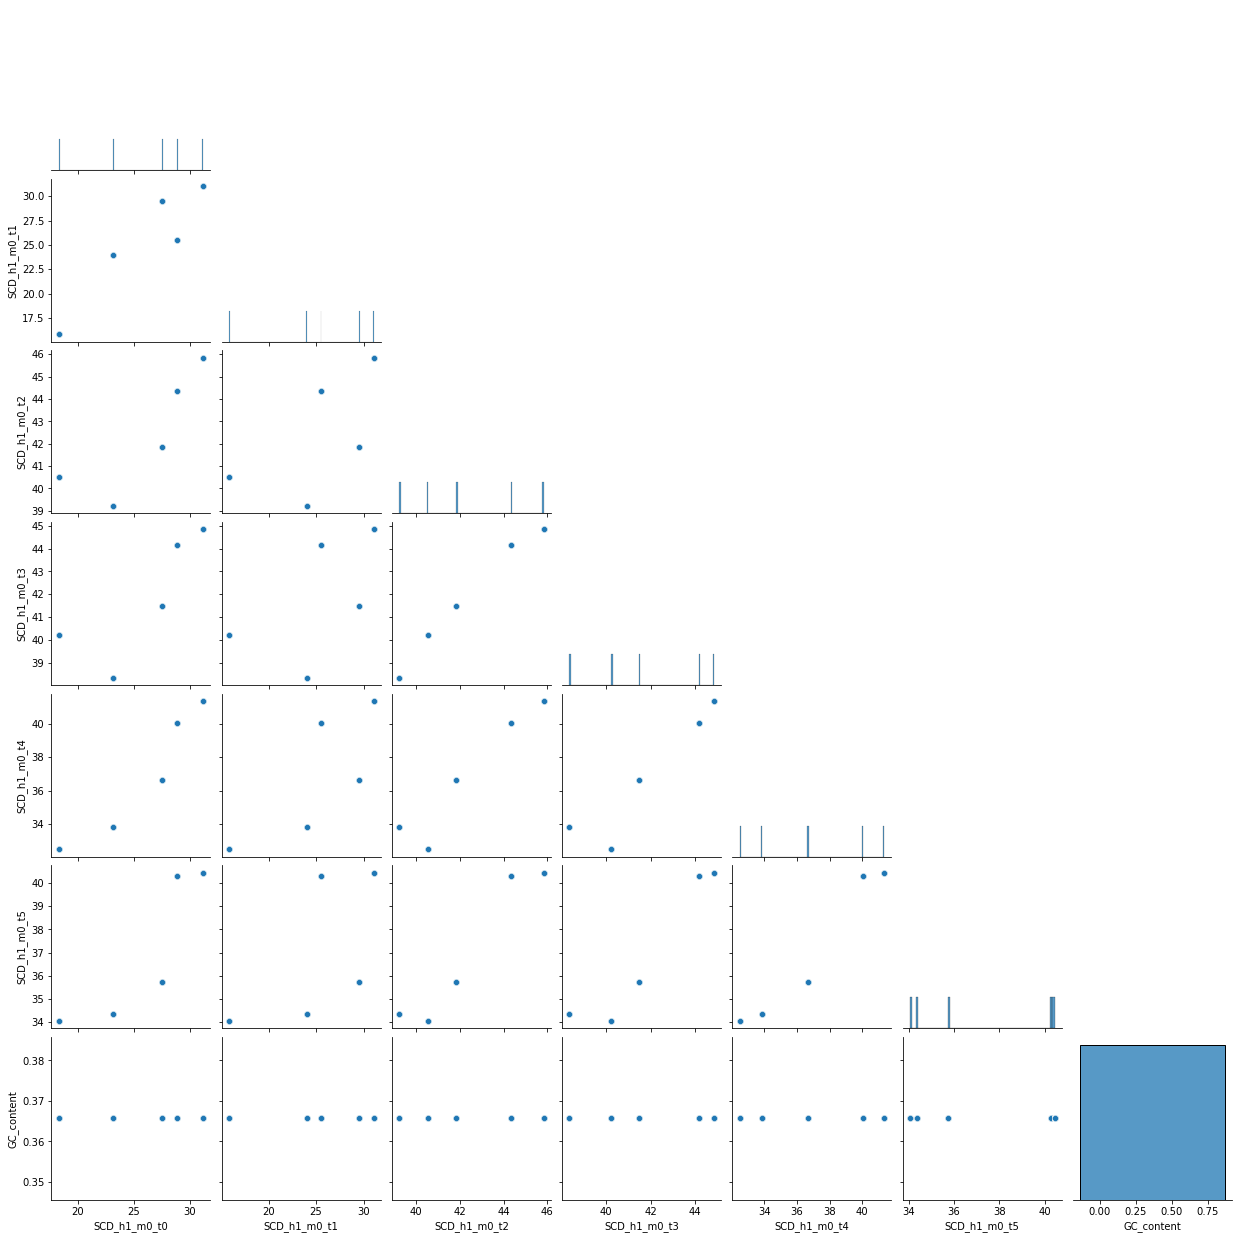

/tmp/SLURM_10574179/ipykernel_164215/1877375924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df["GC_content"] = copy_merge["GC_content"]


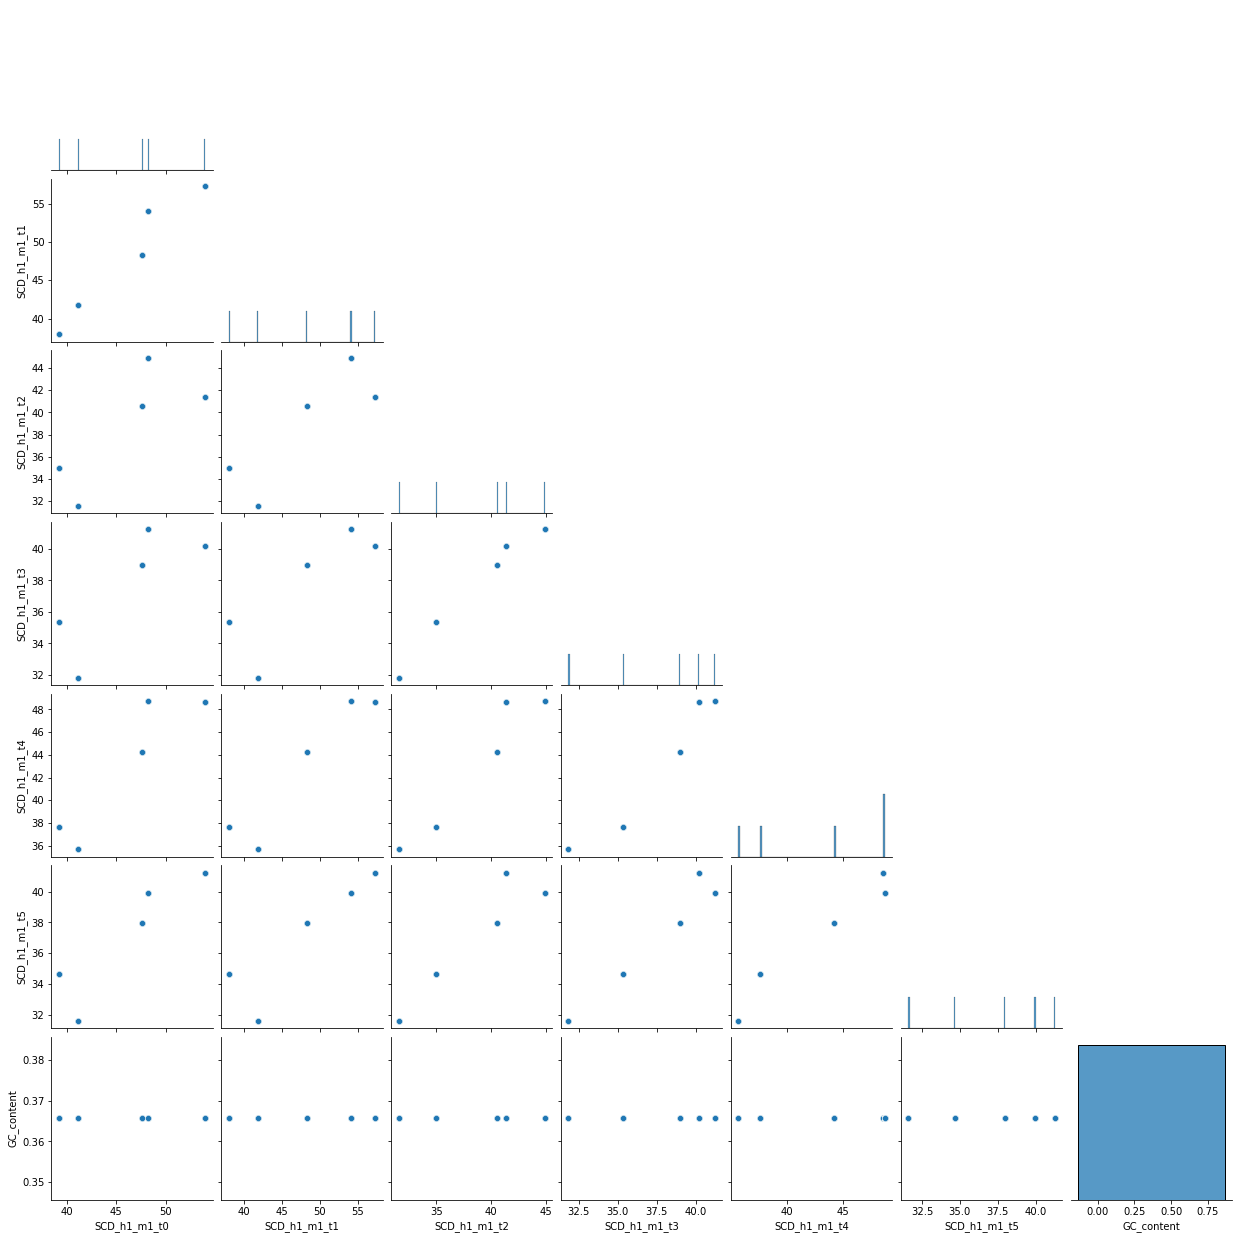

/tmp/SLURM_10574179/ipykernel_164215/1877375924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df["GC_content"] = copy_merge["GC_content"]


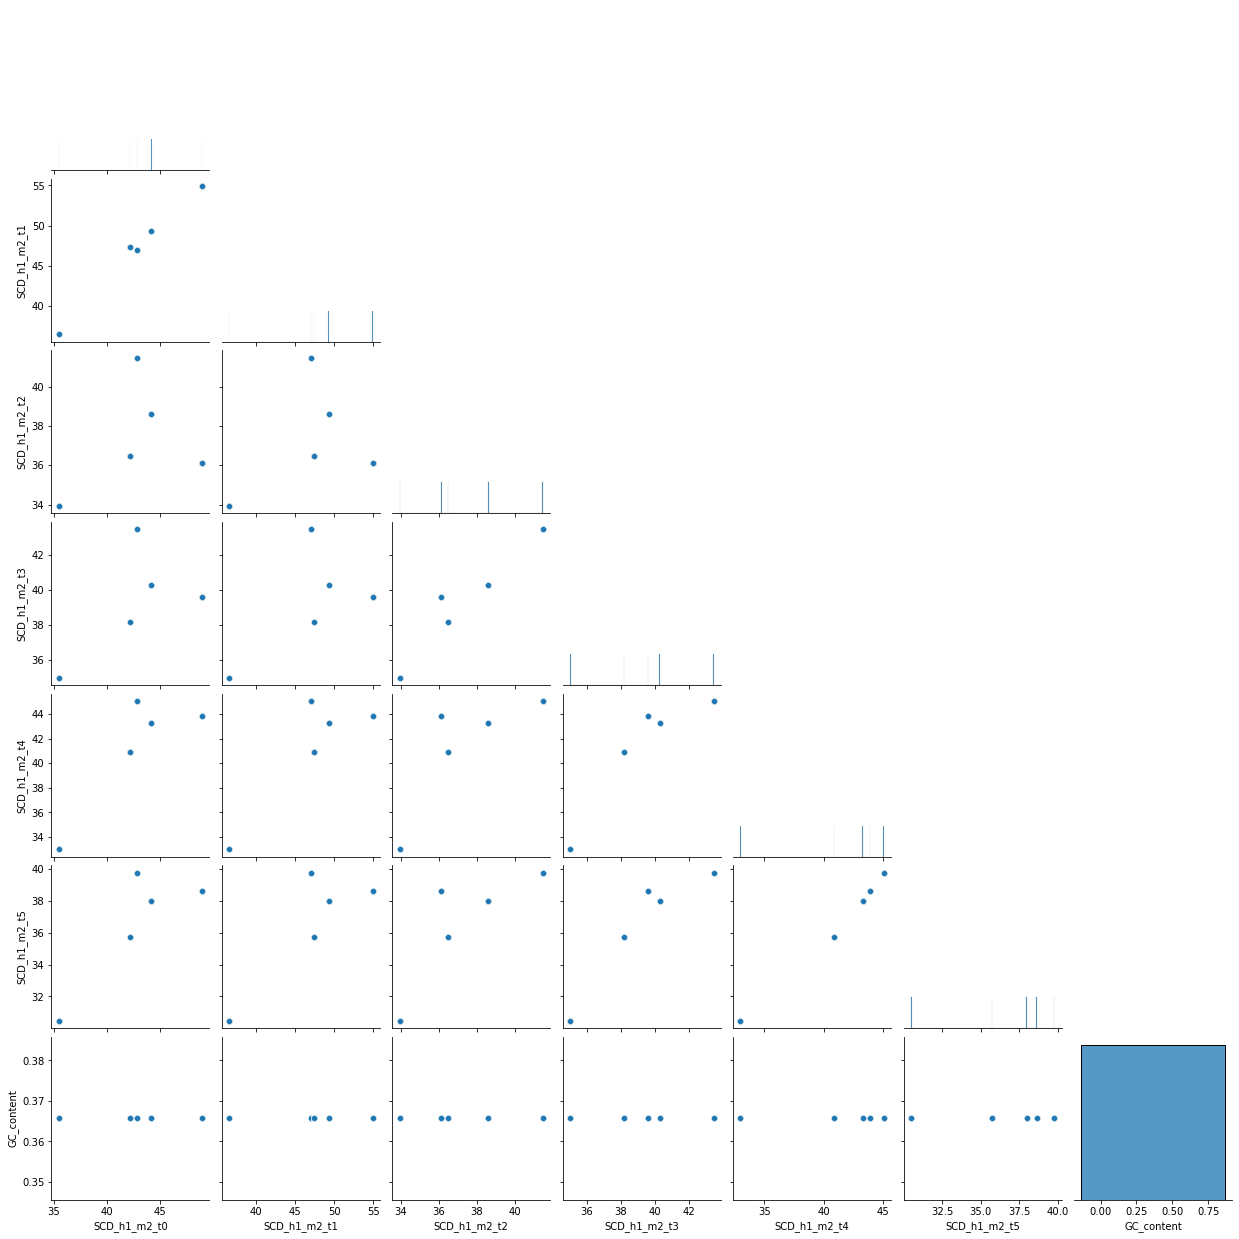

/tmp/SLURM_10574179/ipykernel_164215/1877375924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df["GC_content"] = copy_merge["GC_content"]


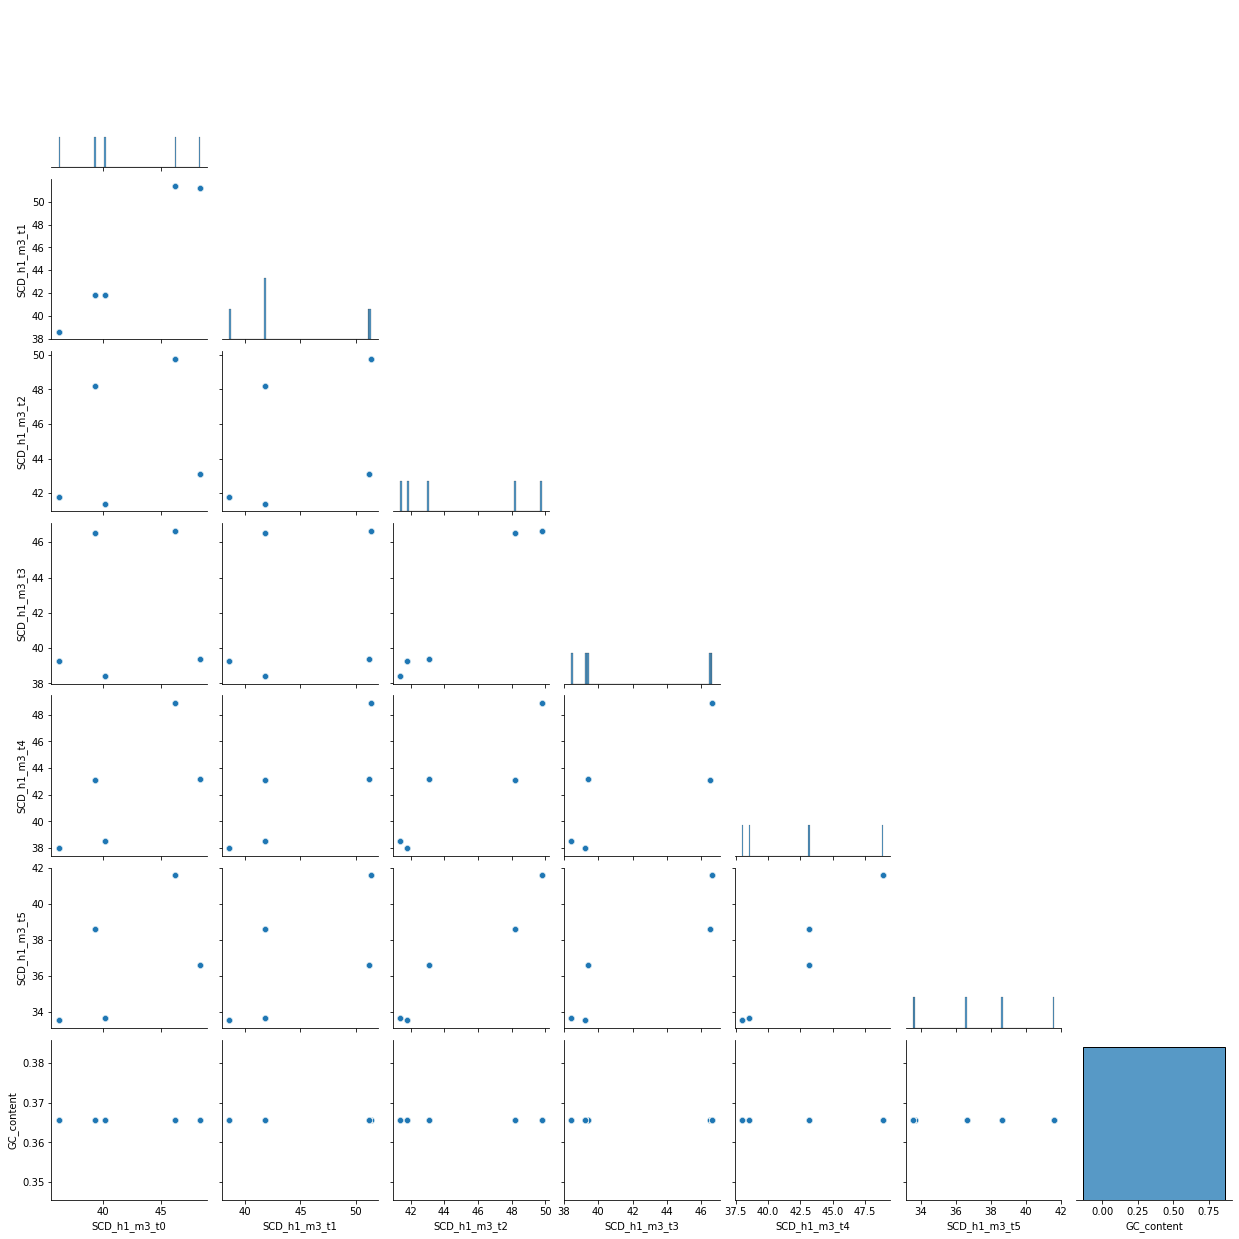

/tmp/SLURM_10574179/ipykernel_164215/1877375924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df["GC_content"] = copy_merge["GC_content"]


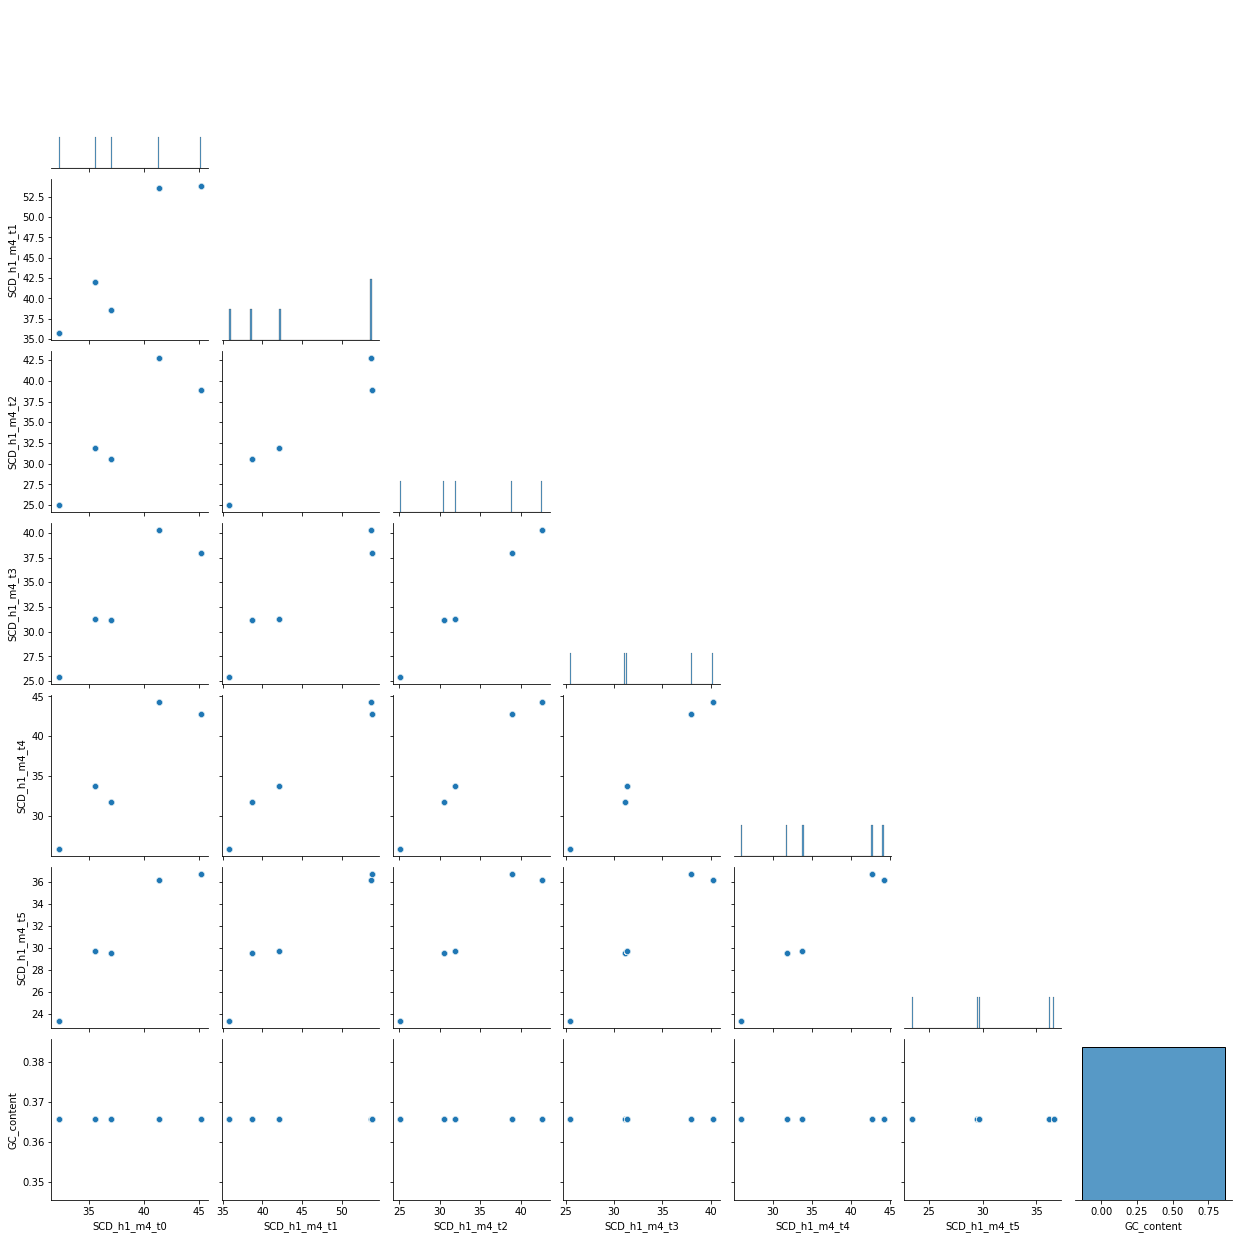

/tmp/SLURM_10574179/ipykernel_164215/1877375924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df["GC_content"] = copy_merge["GC_content"]


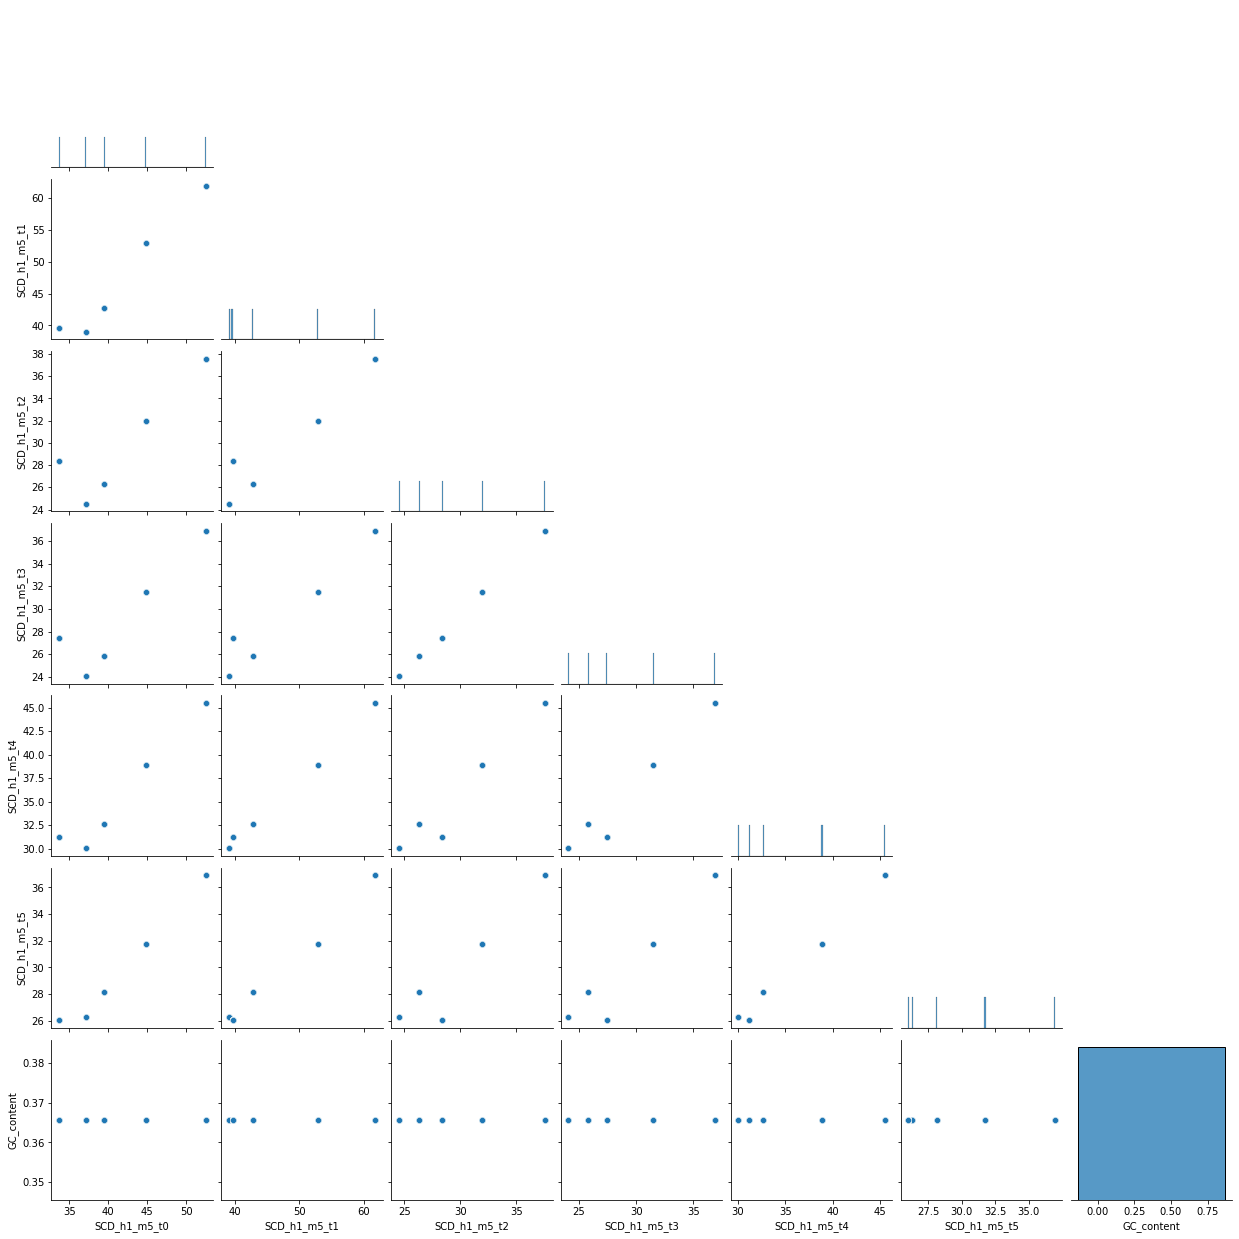

/tmp/SLURM_10574179/ipykernel_164215/1877375924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df["GC_content"] = copy_merge["GC_content"]


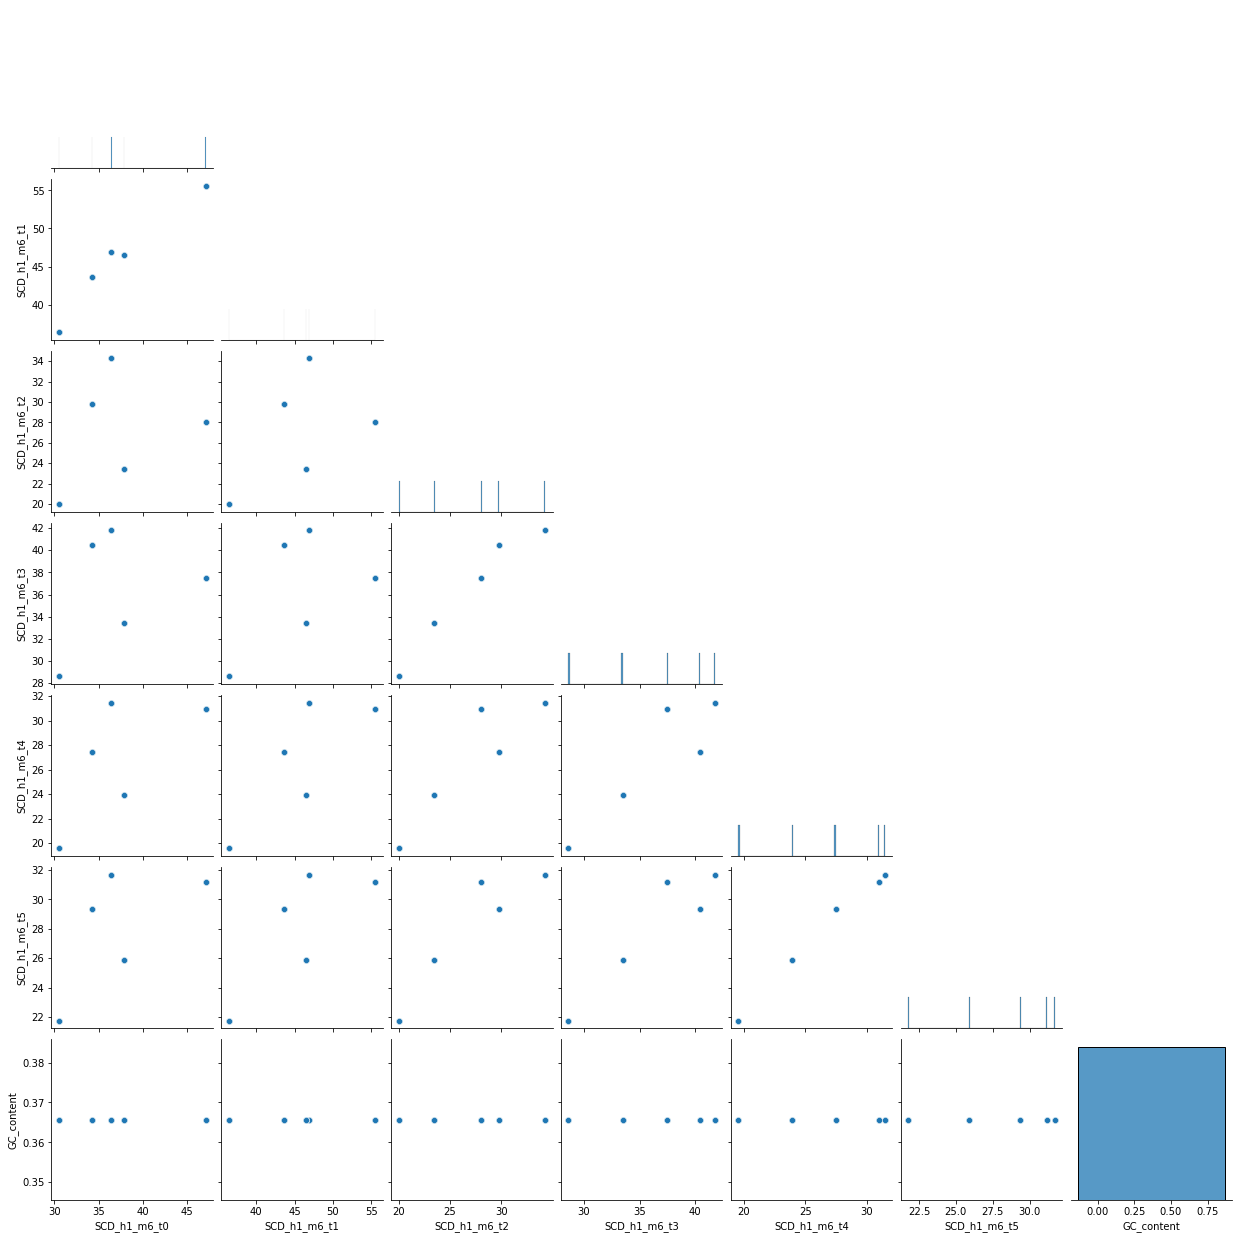

/tmp/SLURM_10574179/ipykernel_164215/1877375924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df["GC_content"] = copy_merge["GC_content"]


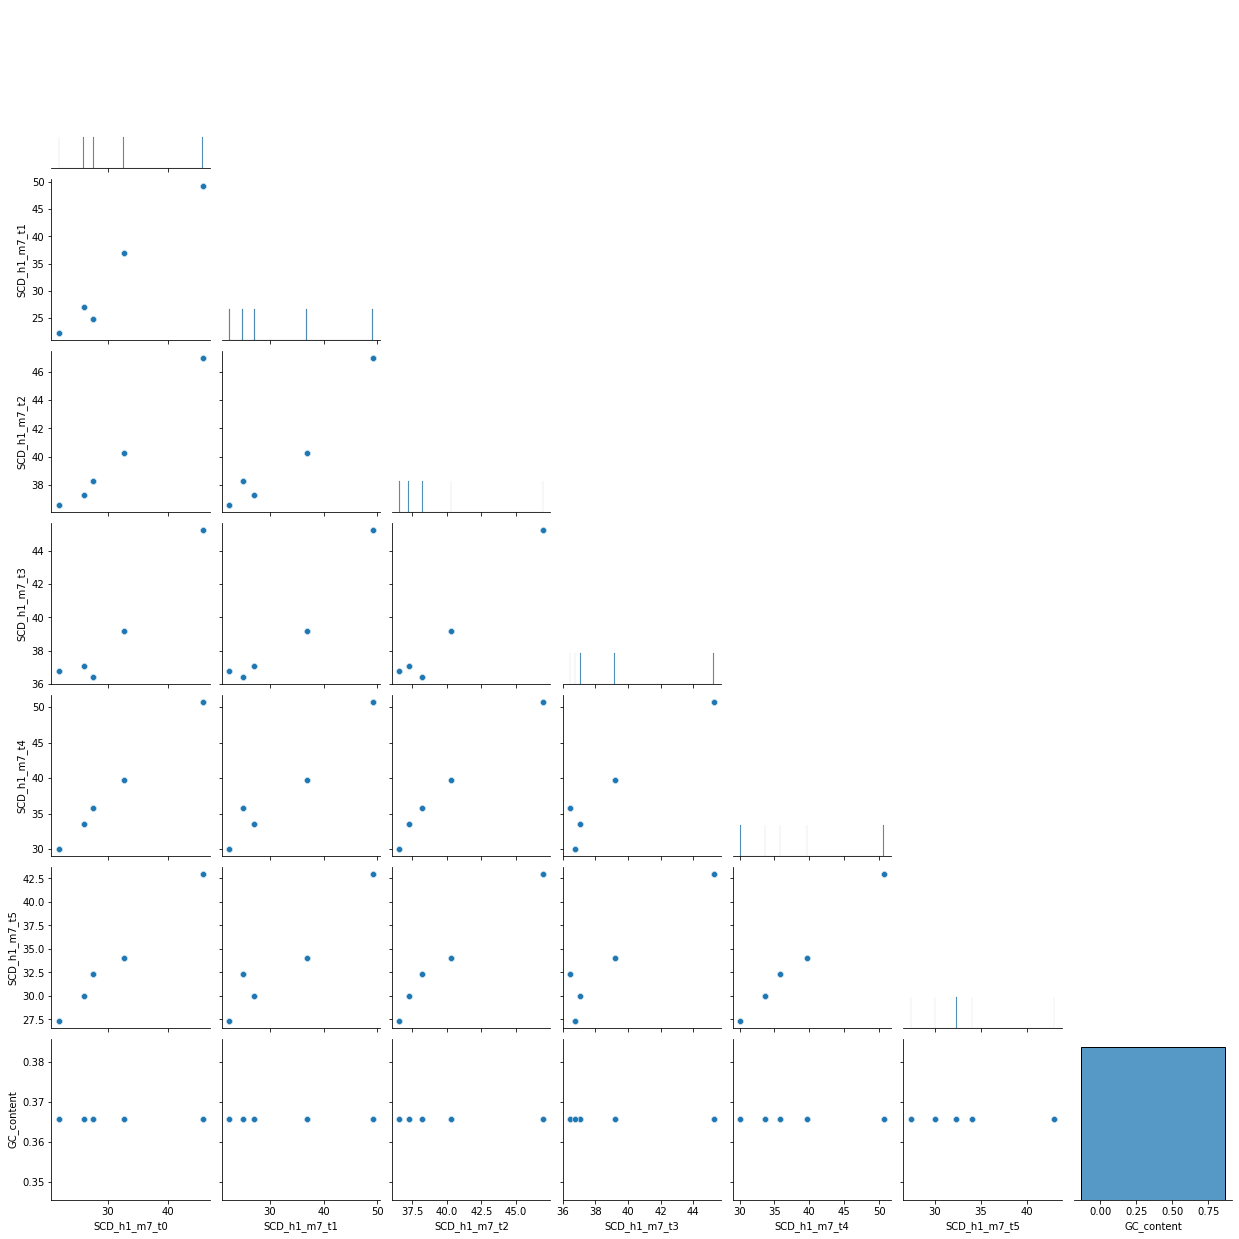

In [5]:
for model in [0,1,2,3,4,5,6,7]:
    model_df = copy_merge[[f"SCD_h1_m{model}_t{target}" for target in range(6)] + ["GC_content"]]
    model_df["GC_content"] = copy_merge["GC_content"]
    # model_df['binned'] = pd.cut(model_df['GC_content'], bins=3)
    sns.pairplot(model_df, corner=True) #, hue="binned"
    plt.show()

In [ ]:
# mean_SCD_score_df = pd.DataFrame(shuffled_seqs_scores_model0["GC_content"],columns=["GC_content"])
# mean_MPS_score_df = pd.DataFrame(shuffled_seqs_scores_model0["GC_content"],columns=["GC_content"])
# mean_CS_score_df = pd.DataFrame(shuffled_seqs_scores_model0["GC_content"],columns=["GC_content"])
# mean_MSS_score_df = pd.DataFrame(shuffled_seqs_scores_model0["GC_content"],columns=["GC_content"])

# for df_num,df in enumerate([shuffled_seqs_scores_model0,shuffled_seqs_scores_model1,shuffled_seqs_scores_model2,shuffled_seqs_scores_model3,shuffled_seqs_scores_model4,shuffled_seqs_scores_model5,shuffled_seqs_scores_model6,shuffled_seqs_scores_model7]):
#     mean_SCD_score_df[f"mean_SCD_score_model_{df_num}"] = df["mean_SCD_score"]
#     mean_MPS_score_df[f"mean_MPS_score_model_{df_num}"] = df["mean_MPS_score"]
#     mean_CS_score_df[f"mean_CS_score_model_{df_num}"] = df["mean_CS_score"]
#     mean_MSS_score_df[f"mean_MSS_score_model_{df_num}"] = df["mean_MSS_score"]


## Variation in scores across different models

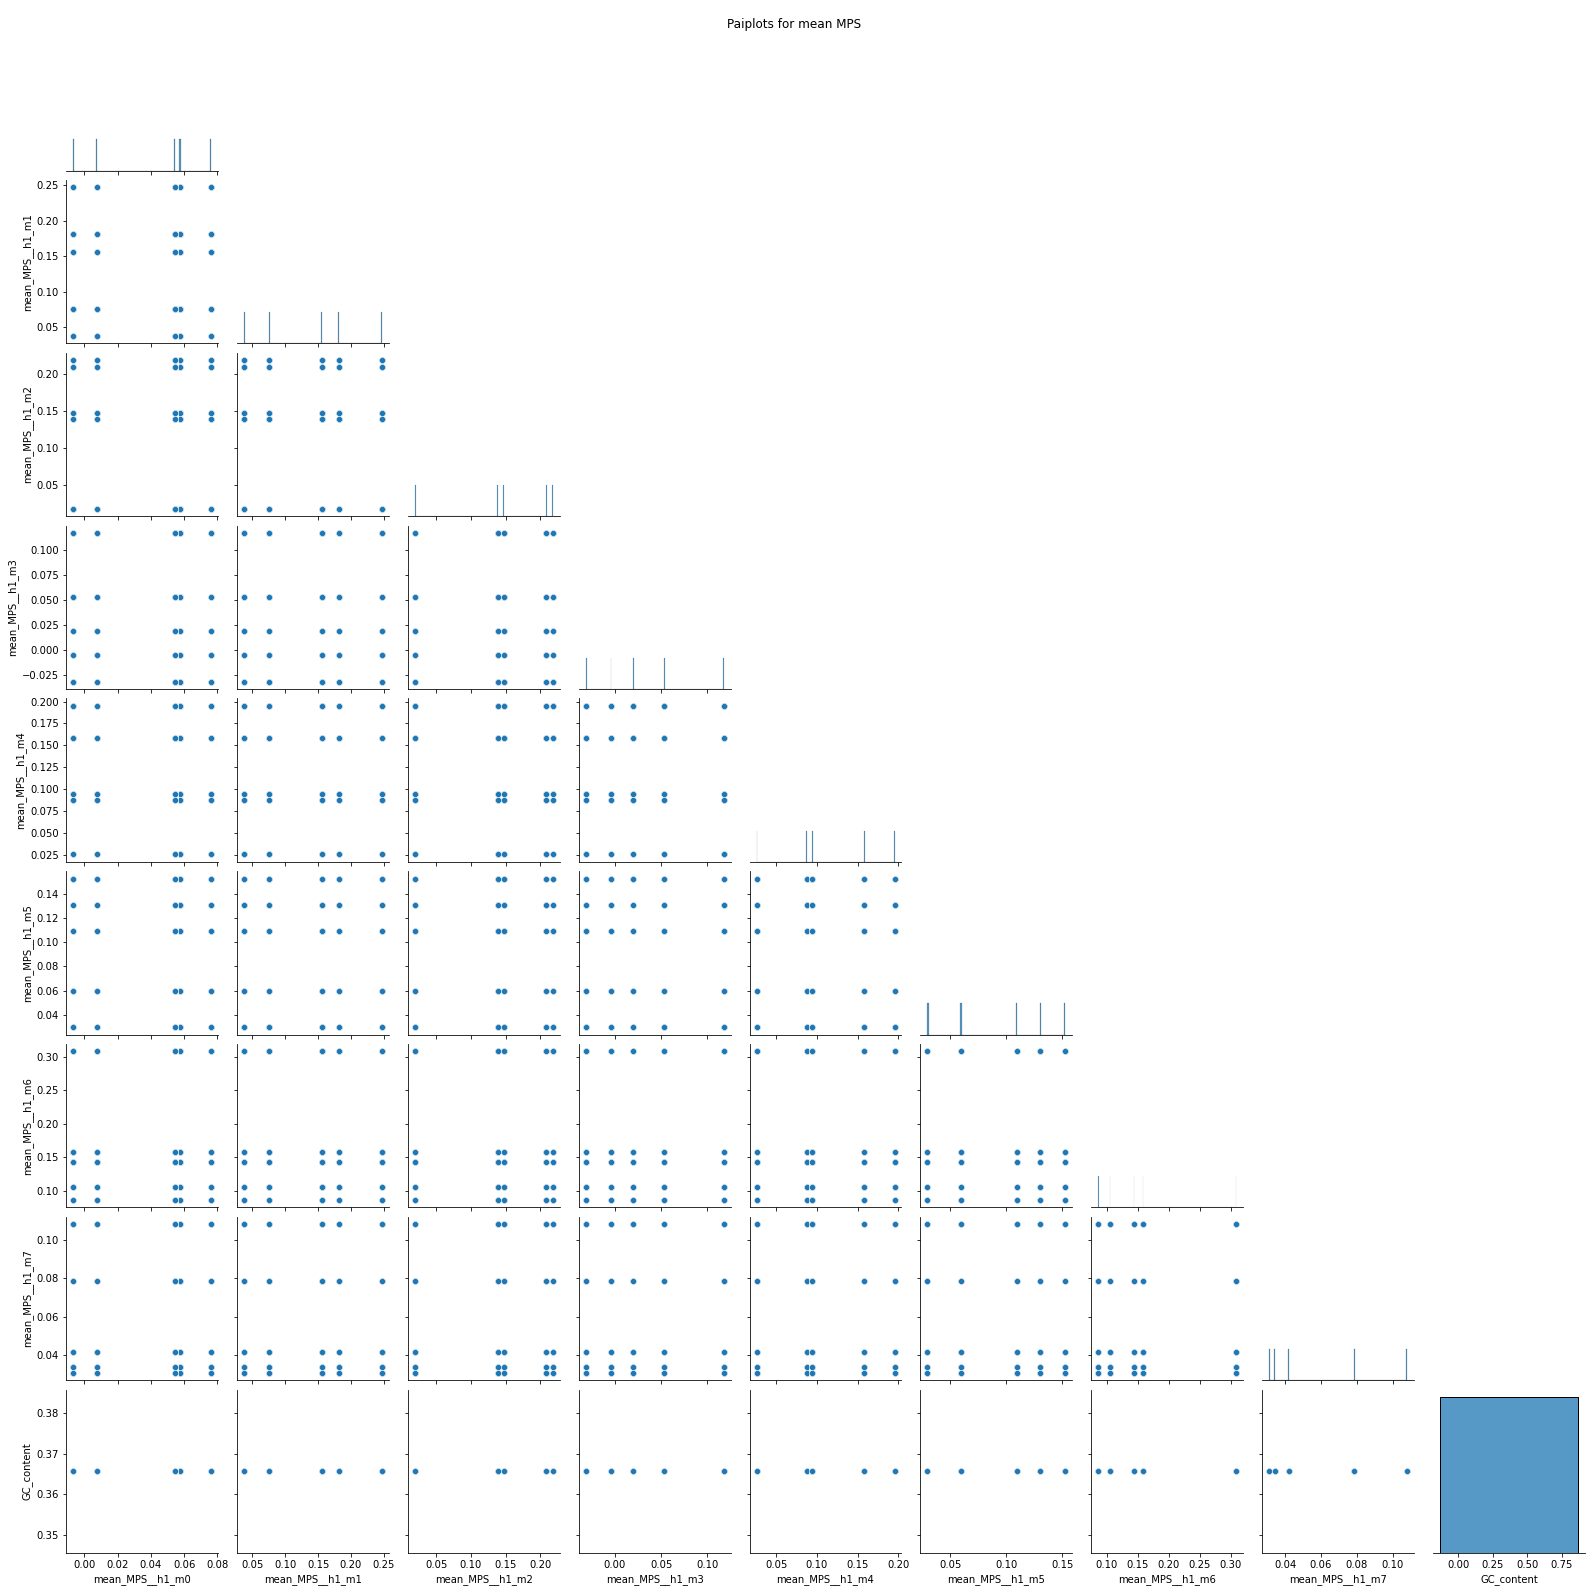

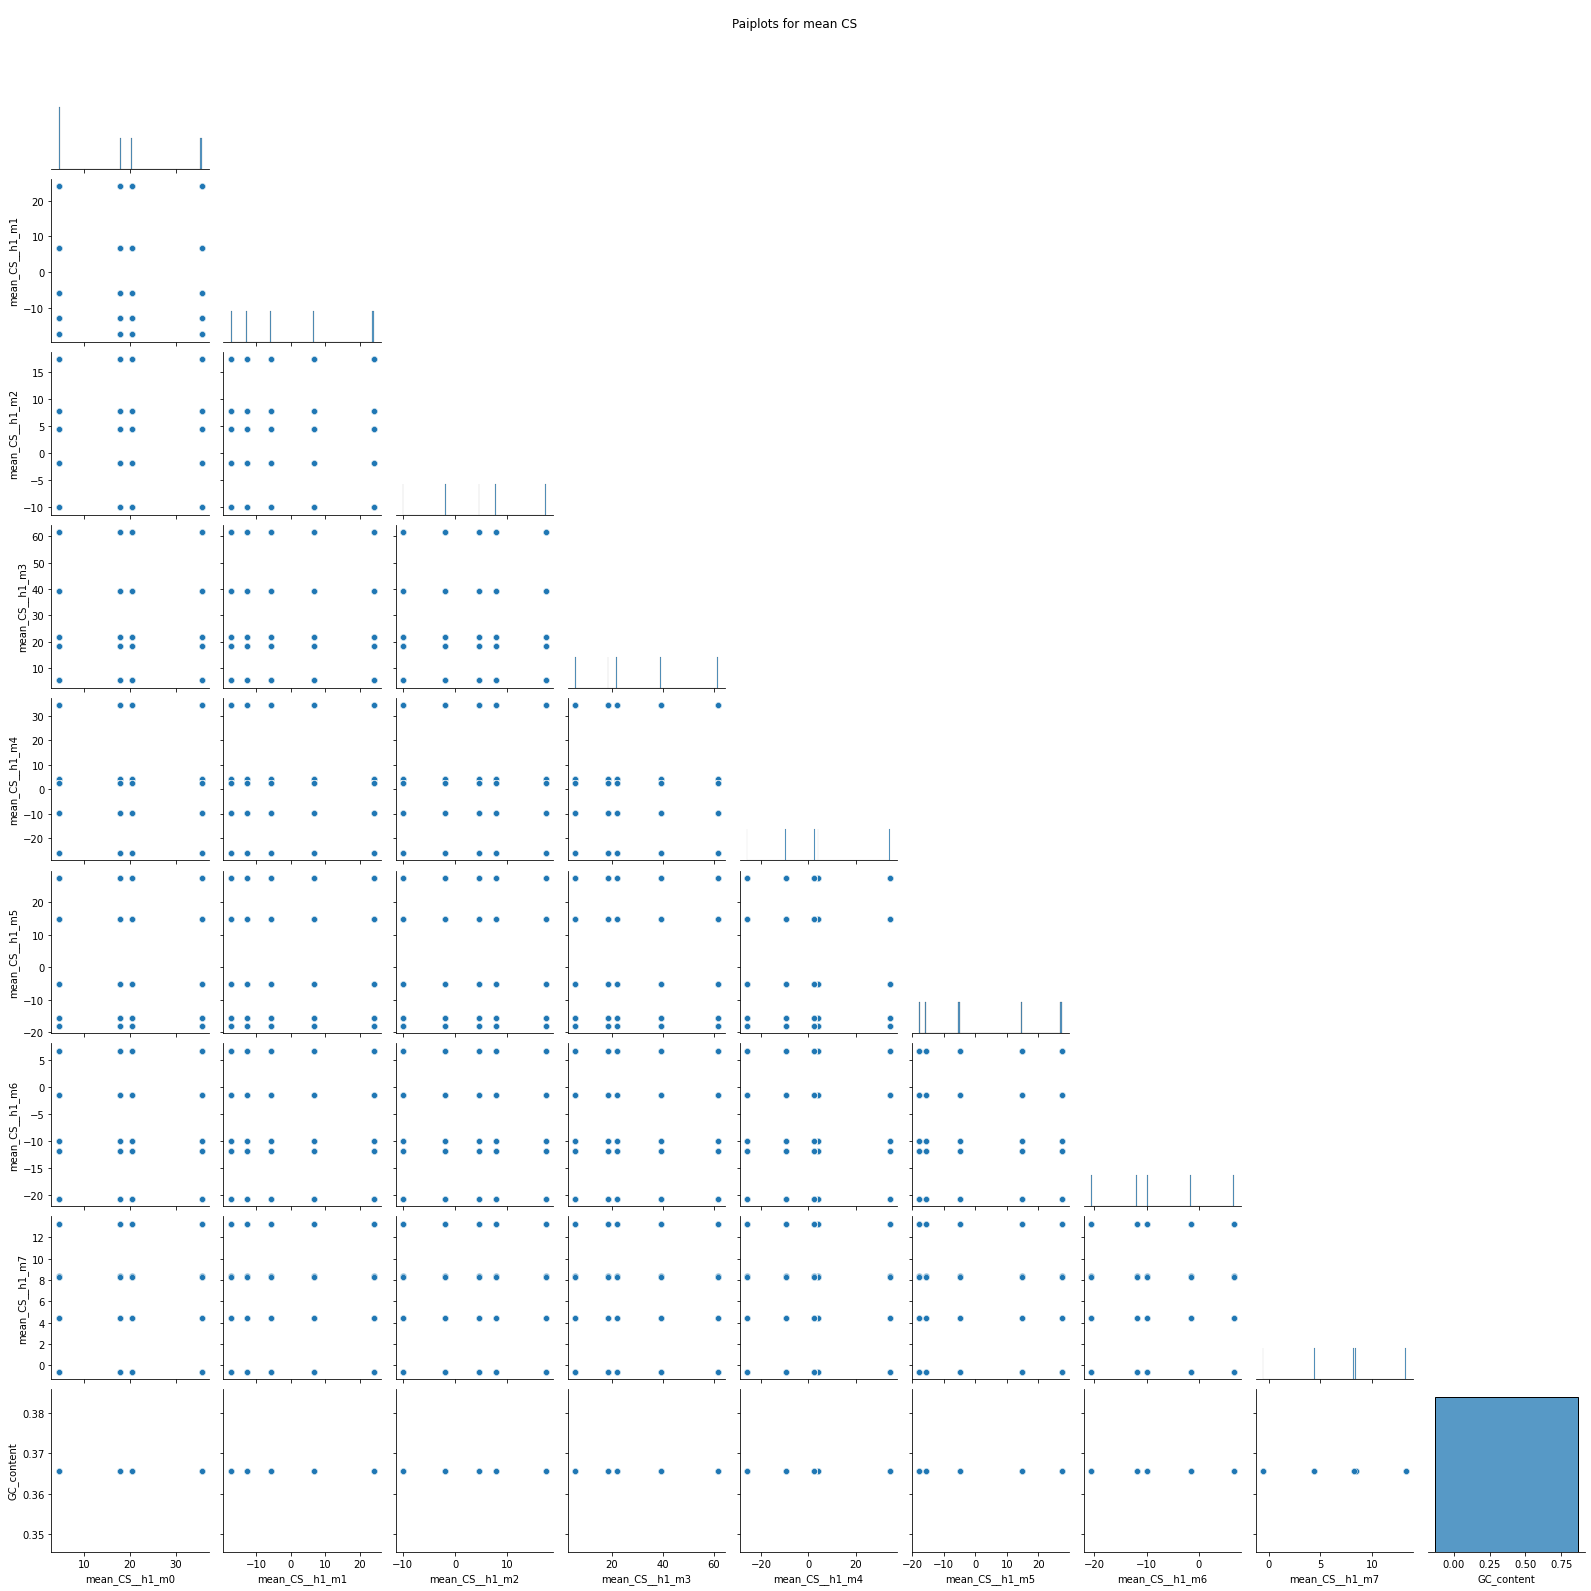

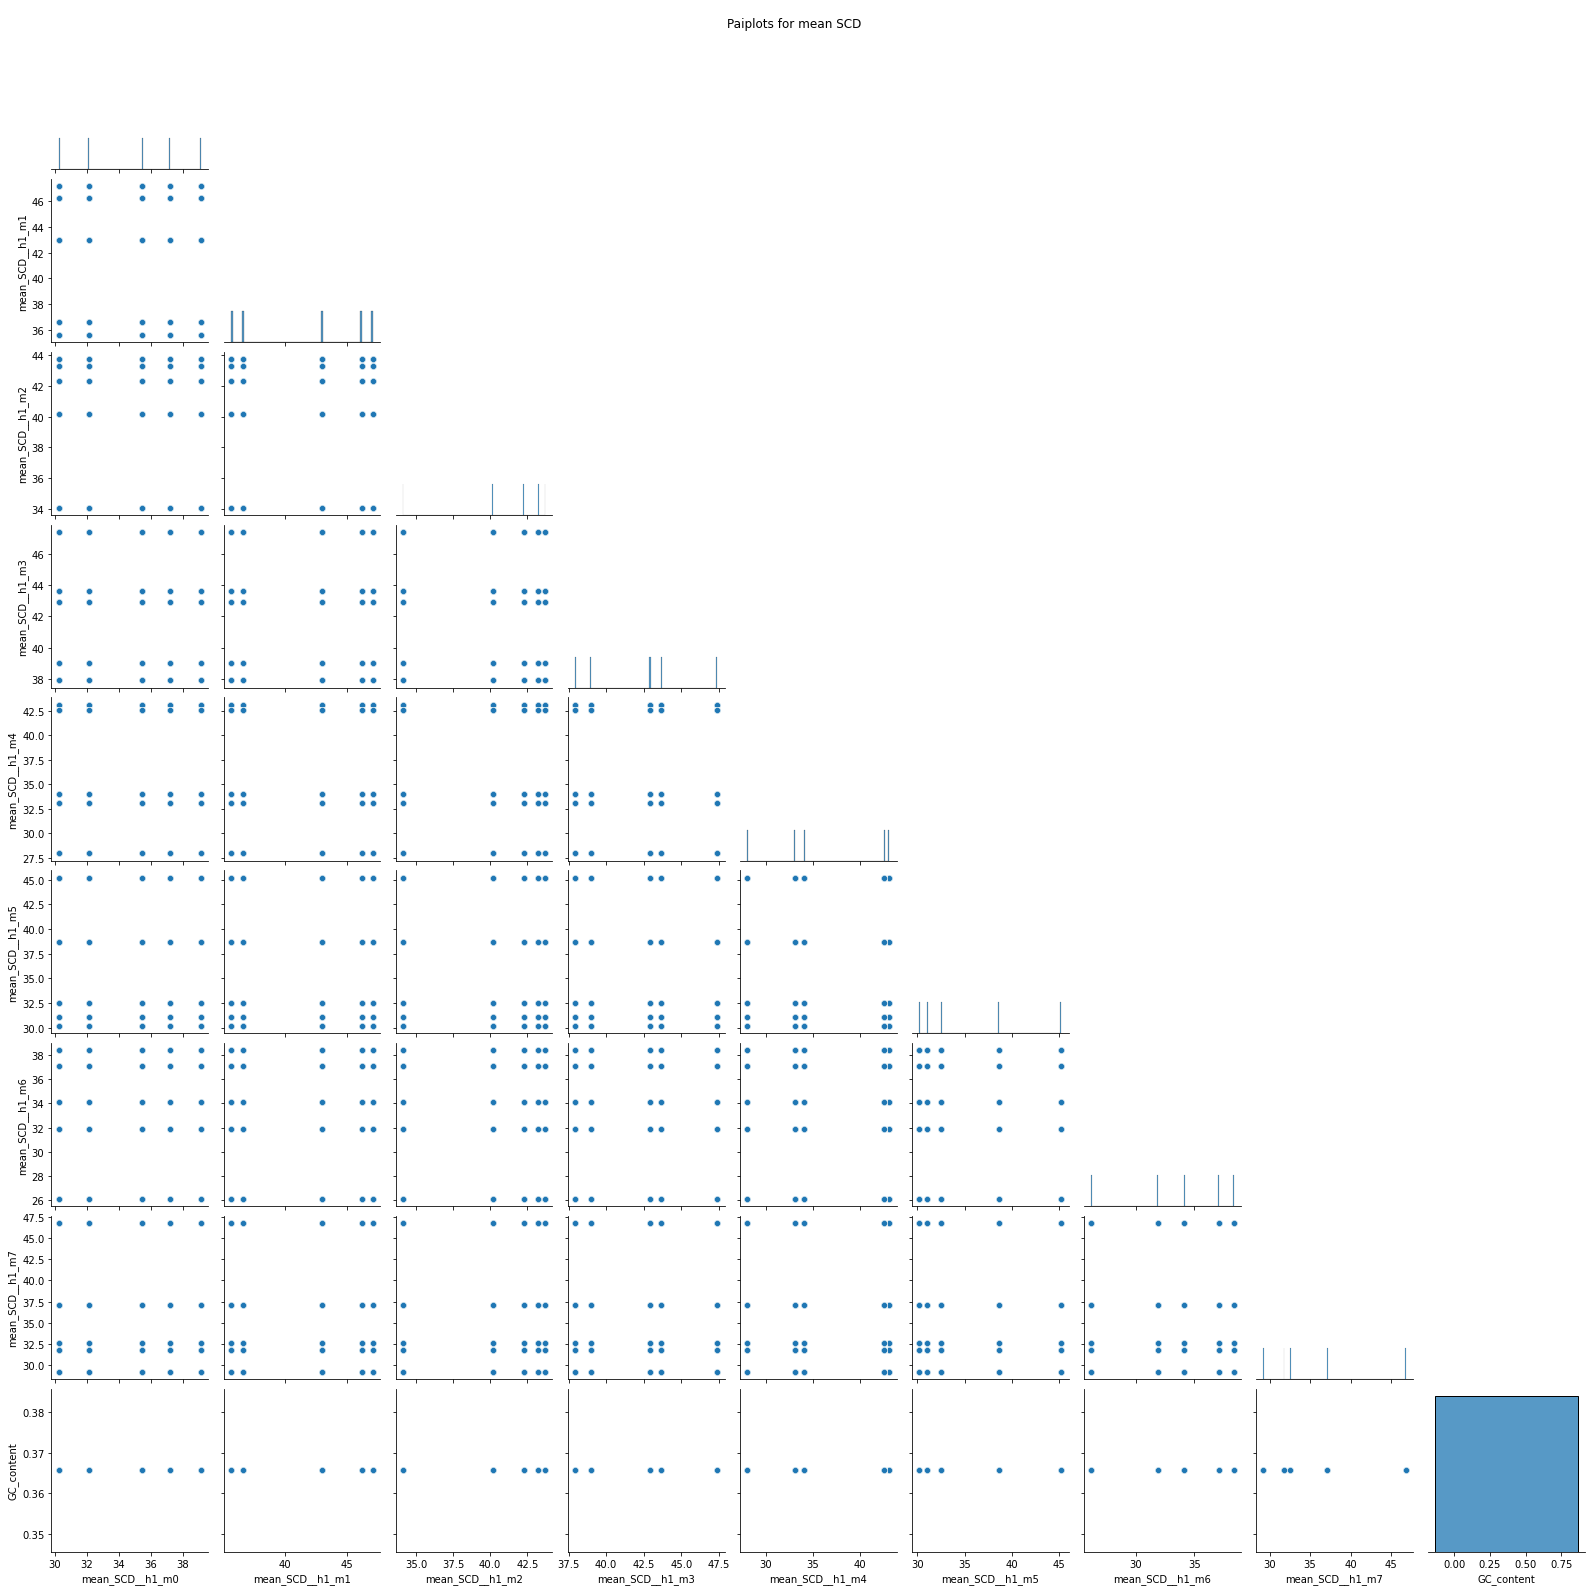

In [6]:
df_names = ["mean_SCD_score_df","mean_MSS_score_df","mean_CS_score_df","mean_MPS_score_df"]

for stat in scd_stats:
    df = copy_merge[[f"mean_{stat}__h1_m{model_num}" for model_num in range(8)] + ["GC_content"] ]
    # for df_num,df in enumerate([mean_SCD_score_df,mean_MSS_score_df,mean_CS_score_df,mean_MPS_score_df]):
    # df['binned'] = pd.cut(df['GC_content'], bins=3)
    ax = sns.pairplot(df, corner=True) #.loc[True == (df["binned"]==df["binned"][0])]    hue="binned",
    fig = ax.fig
    fig.suptitle(f"Paiplots for mean {stat} \n \n \n")
    plt.show()


In [ ]:
for score in ["mean_SCD_score","mean_MPS_score","mean_CS_score"]: #
    sns.kdeplot(data=dfs, x= score, bw_adjust=.1, fill=True) # , hue="shuffle_parameter",
    plt.title(f"General distributions of different shuffle parameters *n={dfs.shape[0]}*")
    sns.despine(top = True, right = True)
    plt.show()
    plt.close()

In [ ]:
for model in [0,1,2,3,4,5,6,7]:
    for stat in scd_stats:
        df = copy_merge[[f"mean_{stat}__h1_m{model}"]]
        # print(df.head())
        sns.kdeplot(data=df, bw_adjust=.1, fill=True) # , hue="shuffle_parameter",
        plt.title(f"General distributions of different shuffle parameters *n={df.shape[0]}*")
        sns.despine(top = True, right = True)
        plt.show()
        plt.close()